In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 20
n = 10_000

optimizer_list = [
    WASGD(weighted=False),  # ASGD
    WASGD(),
    SNARiccati(),
    WASNARiccati(),
    WASNARiccati(compute_hessian_theta_avg=False),
    USNA(c_nu=5.0),
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False),
    UWASNA(c_nu = 5.0, compute_hessian_theta_avg=False, use_hessian_avg=False),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

import copy
optimizer_list_without_riccati = copy.deepcopy(optimizer_list)
optimizer_list_without_riccati[2] = SNA()
optimizer_list_without_riccati[3] = WASNA()
optimizer_list_without_riccati[4] = WASNA(compute_hessian_theta_avg=False)

In [3]:
# N = 2
# n = 1000

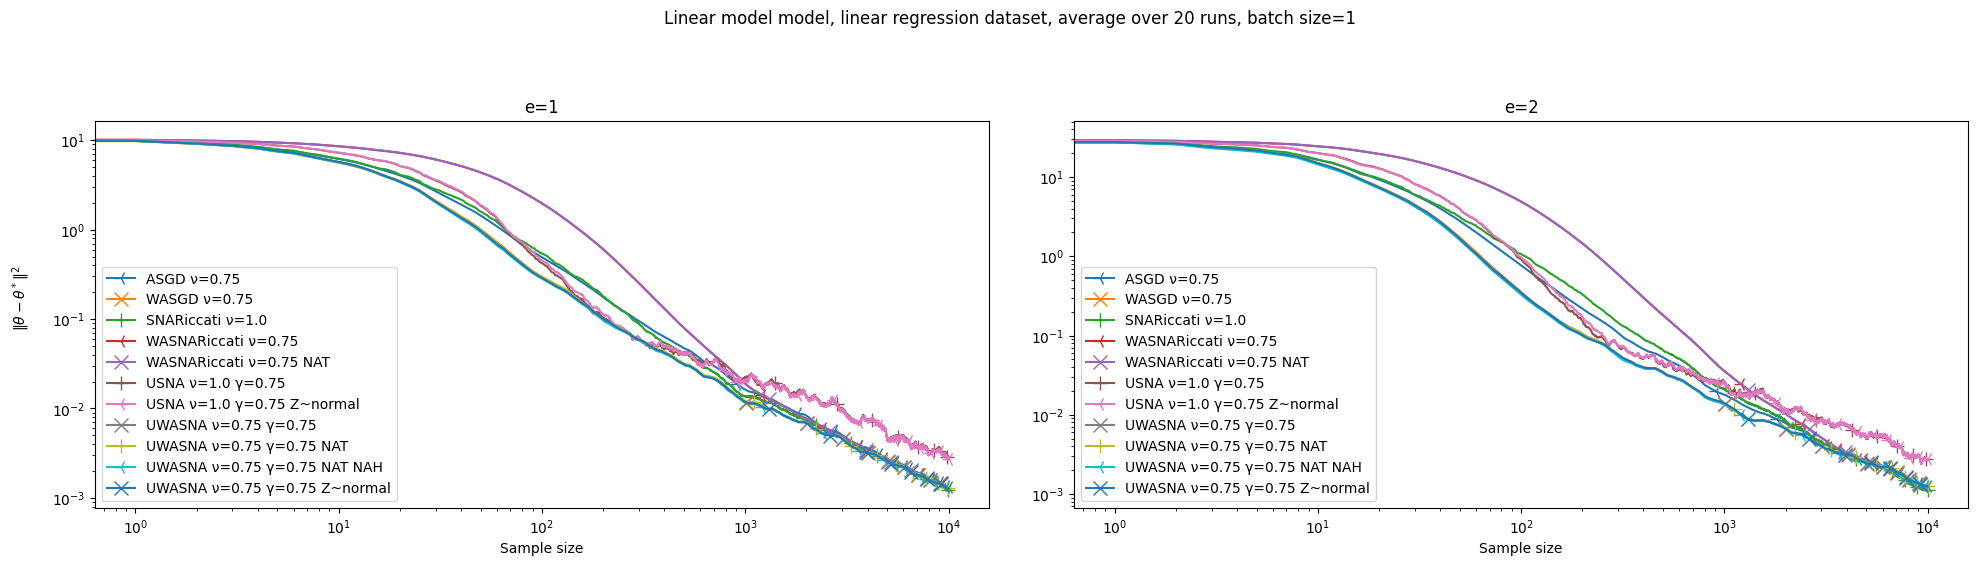

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

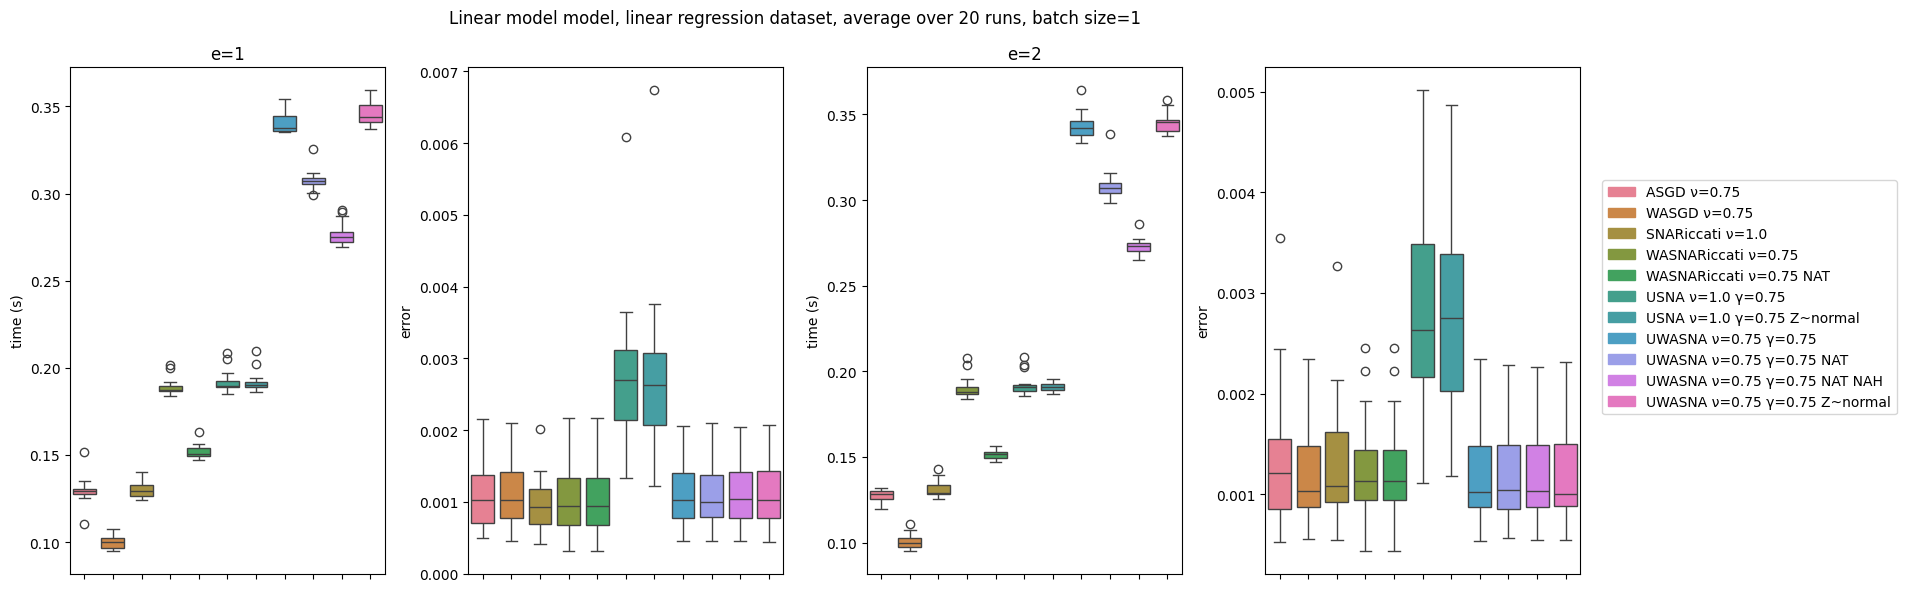

In [5]:
simulation.run_multiple_datasets(N=N, n=n, eval_time=True)

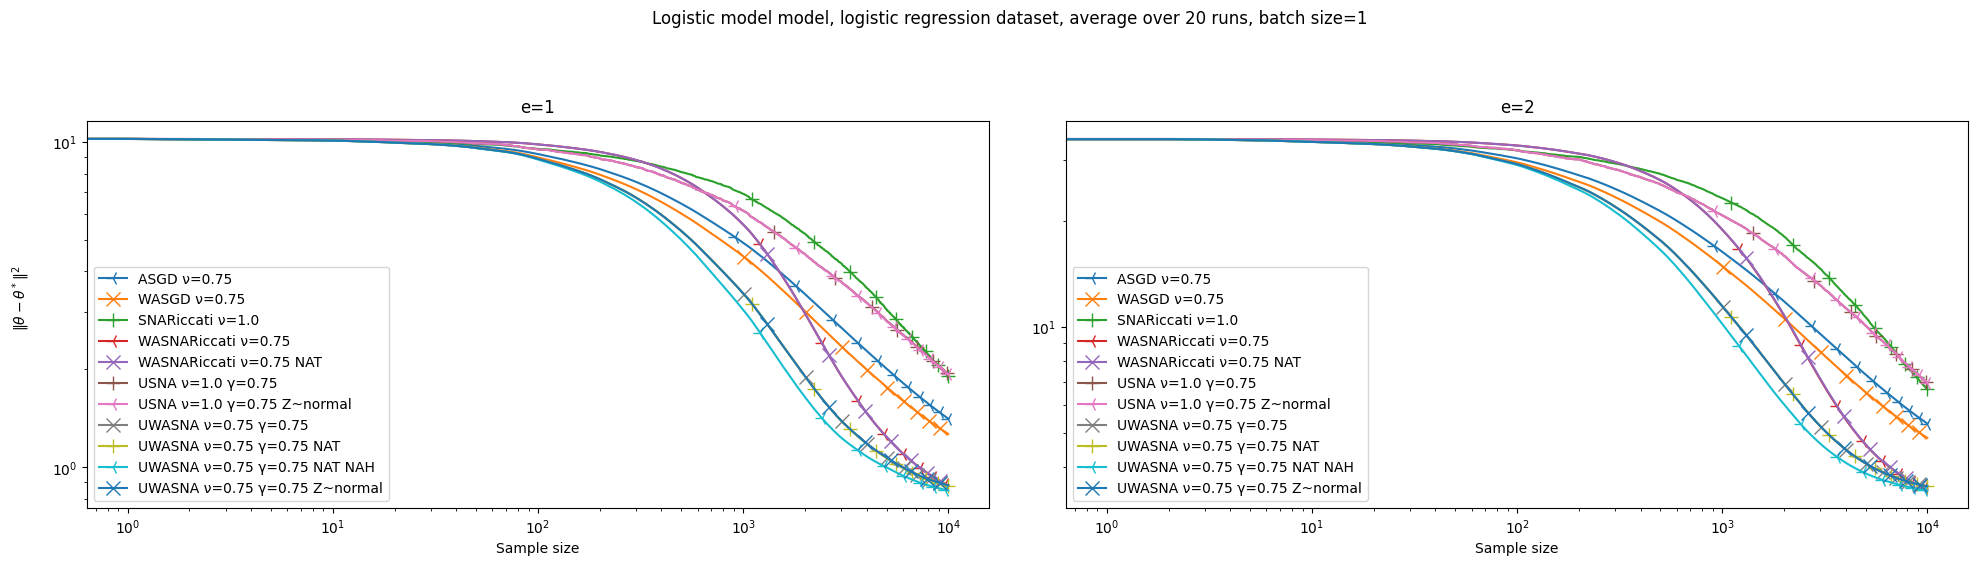

In [6]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

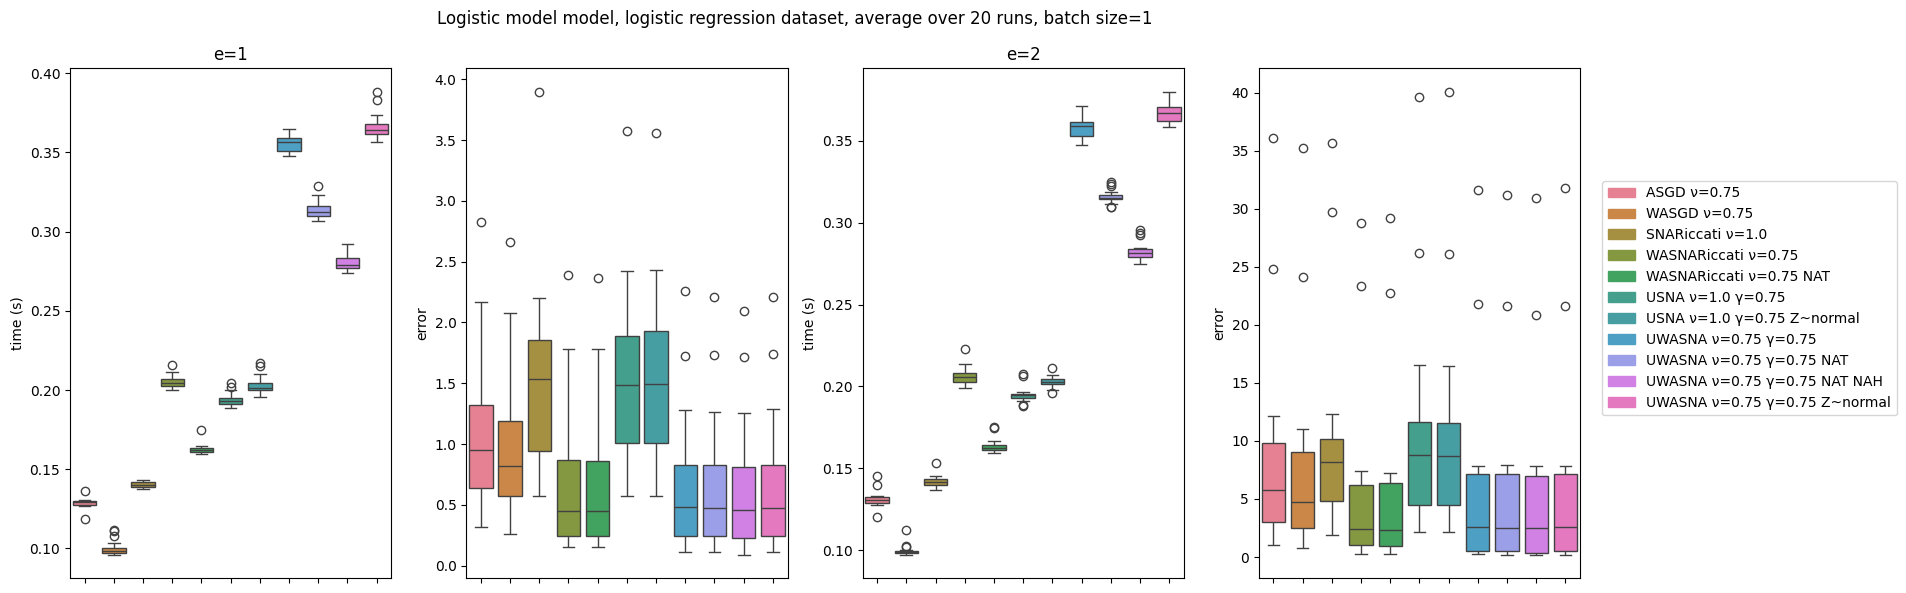

In [7]:
simulation.run_multiple_datasets(N=N, n=n, eval_time=True)

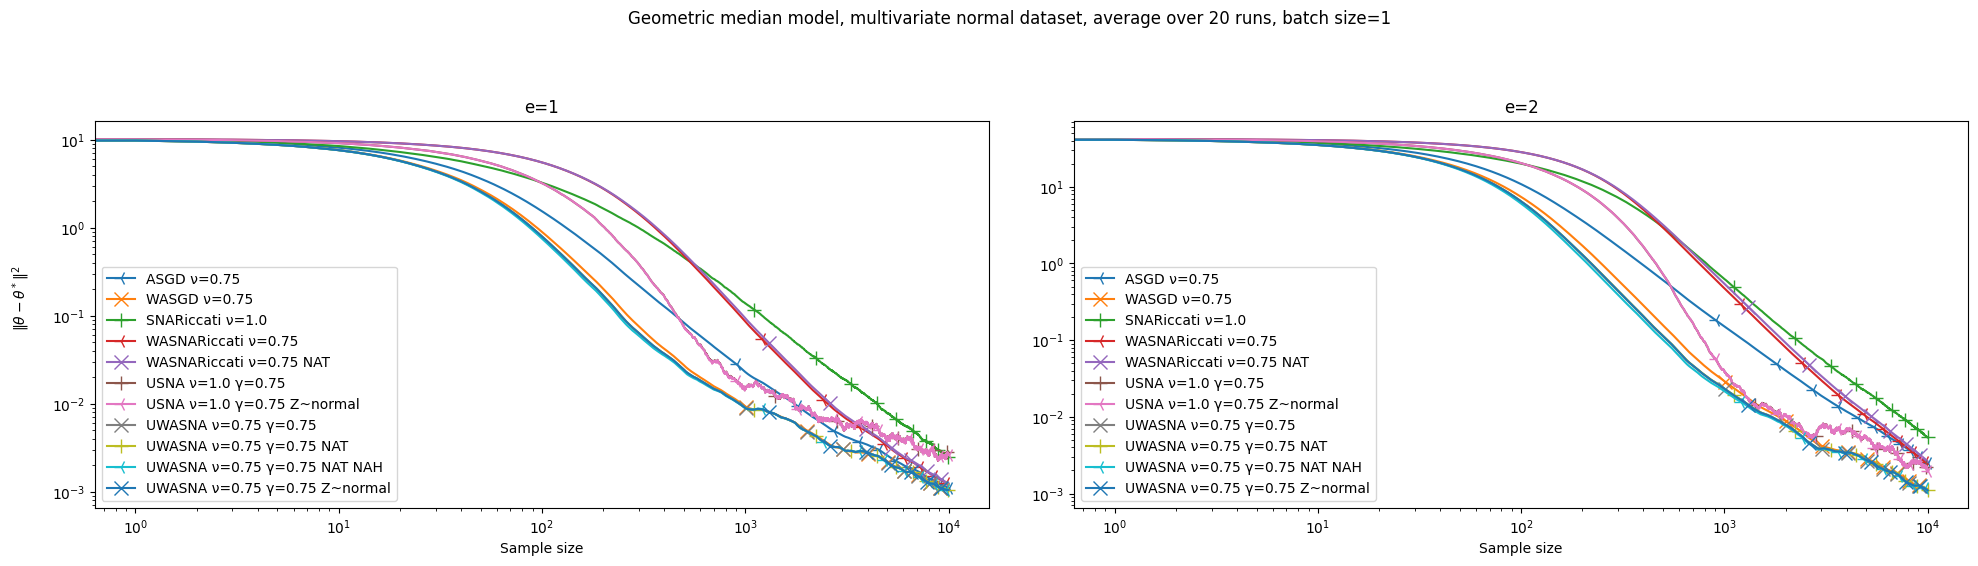

In [8]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=20, n=n)

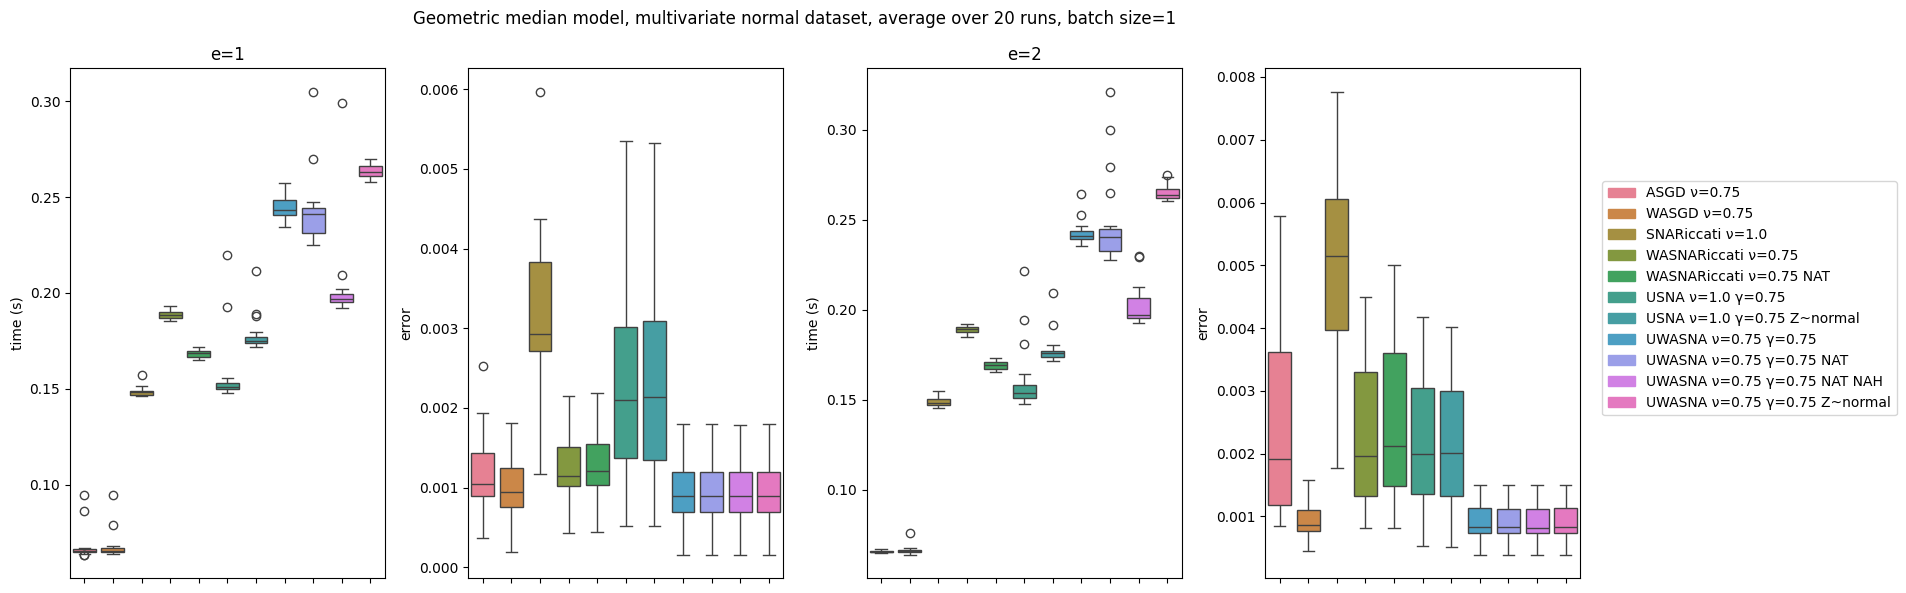

In [9]:
simulation.run_multiple_datasets(N=N, n=n, eval_time=True)

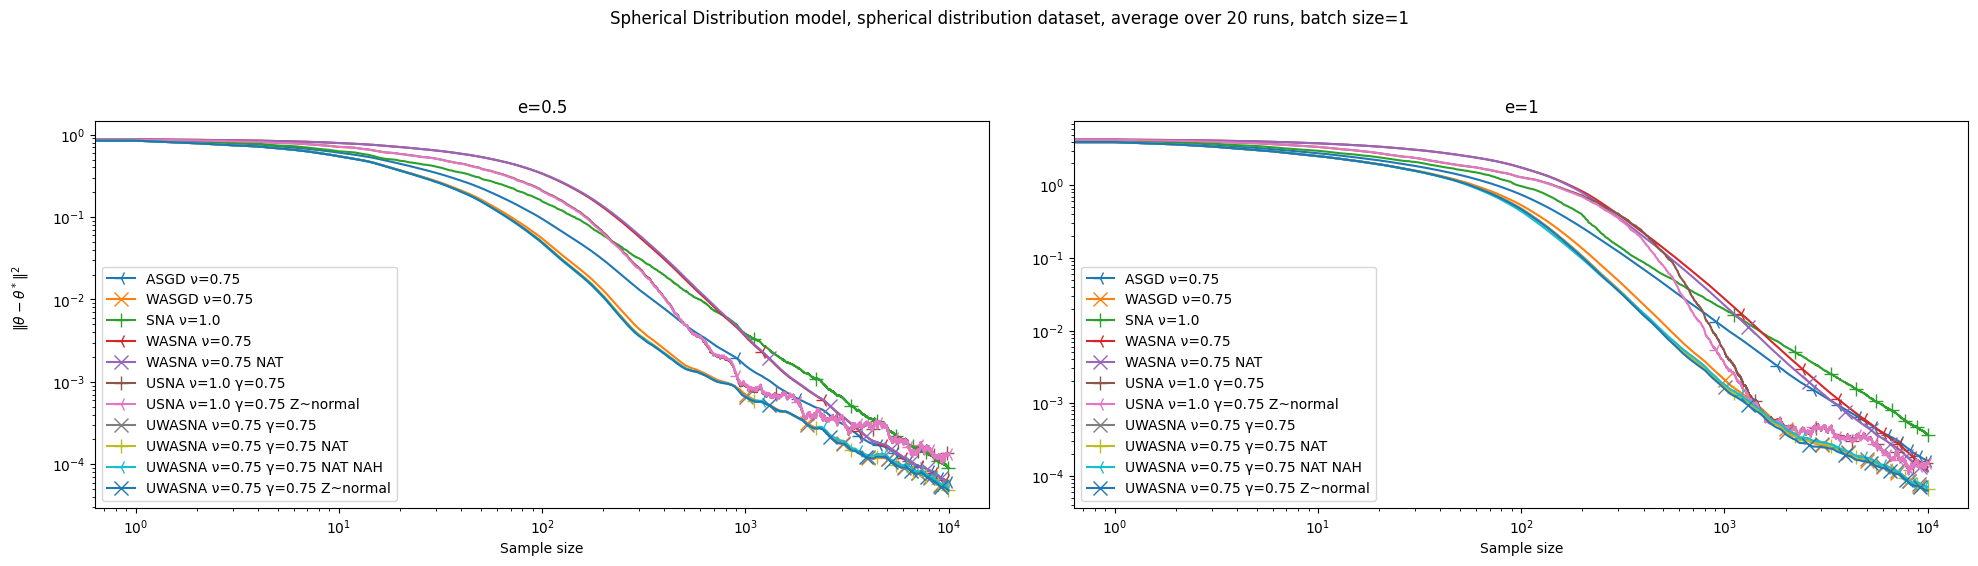

In [10]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_datasets(N=N, n=n)

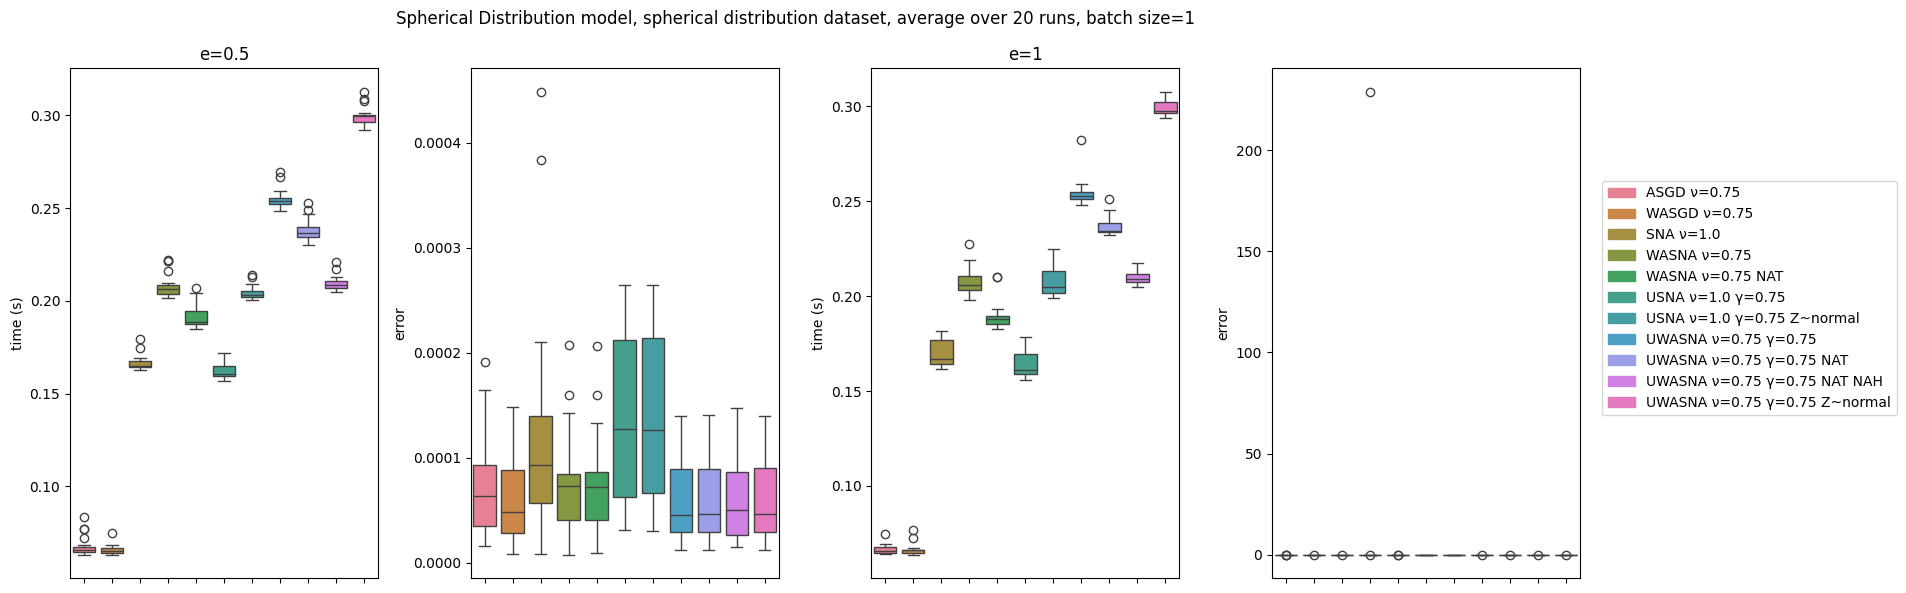

In [11]:
simulation.run_multiple_datasets(N=N, n=n, eval_time=True)

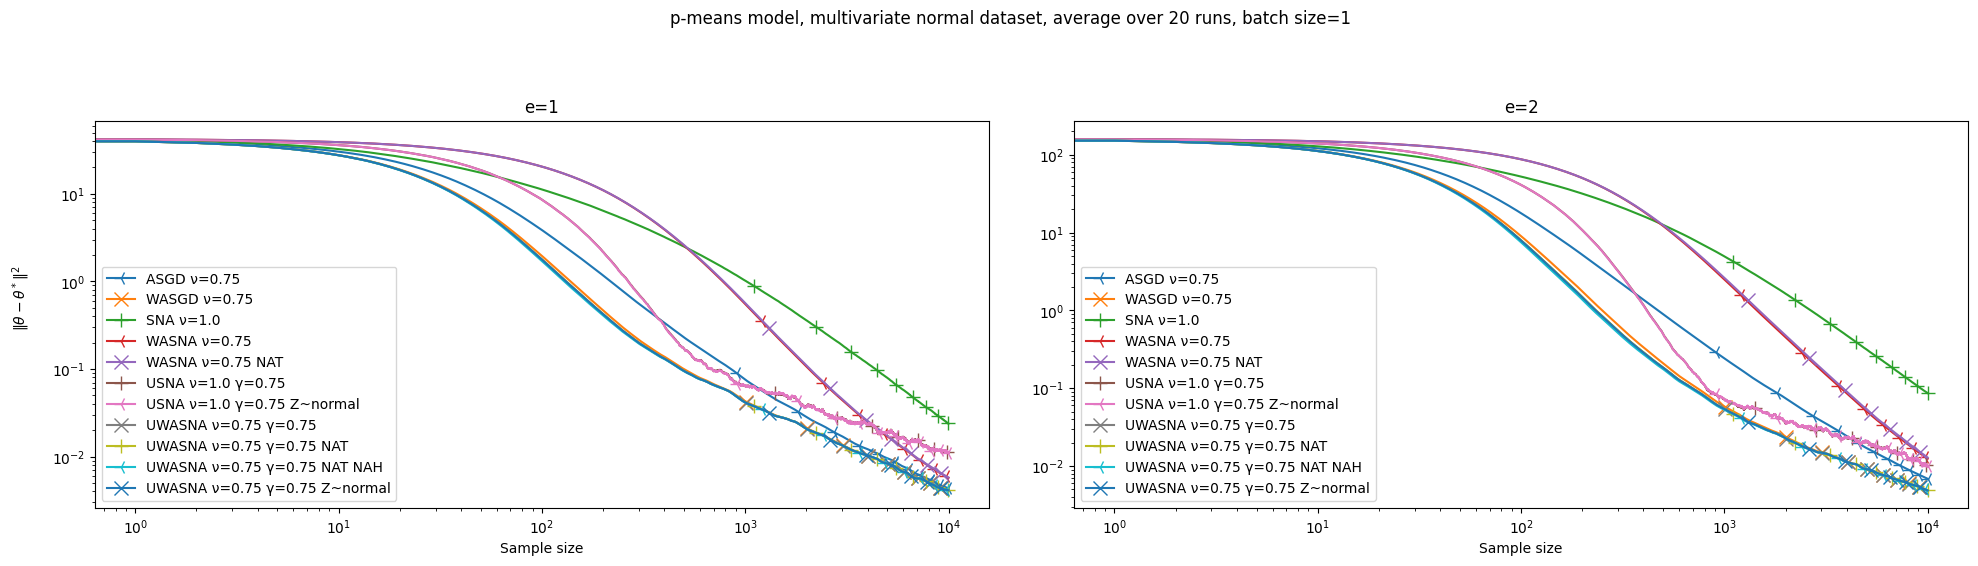

In [12]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

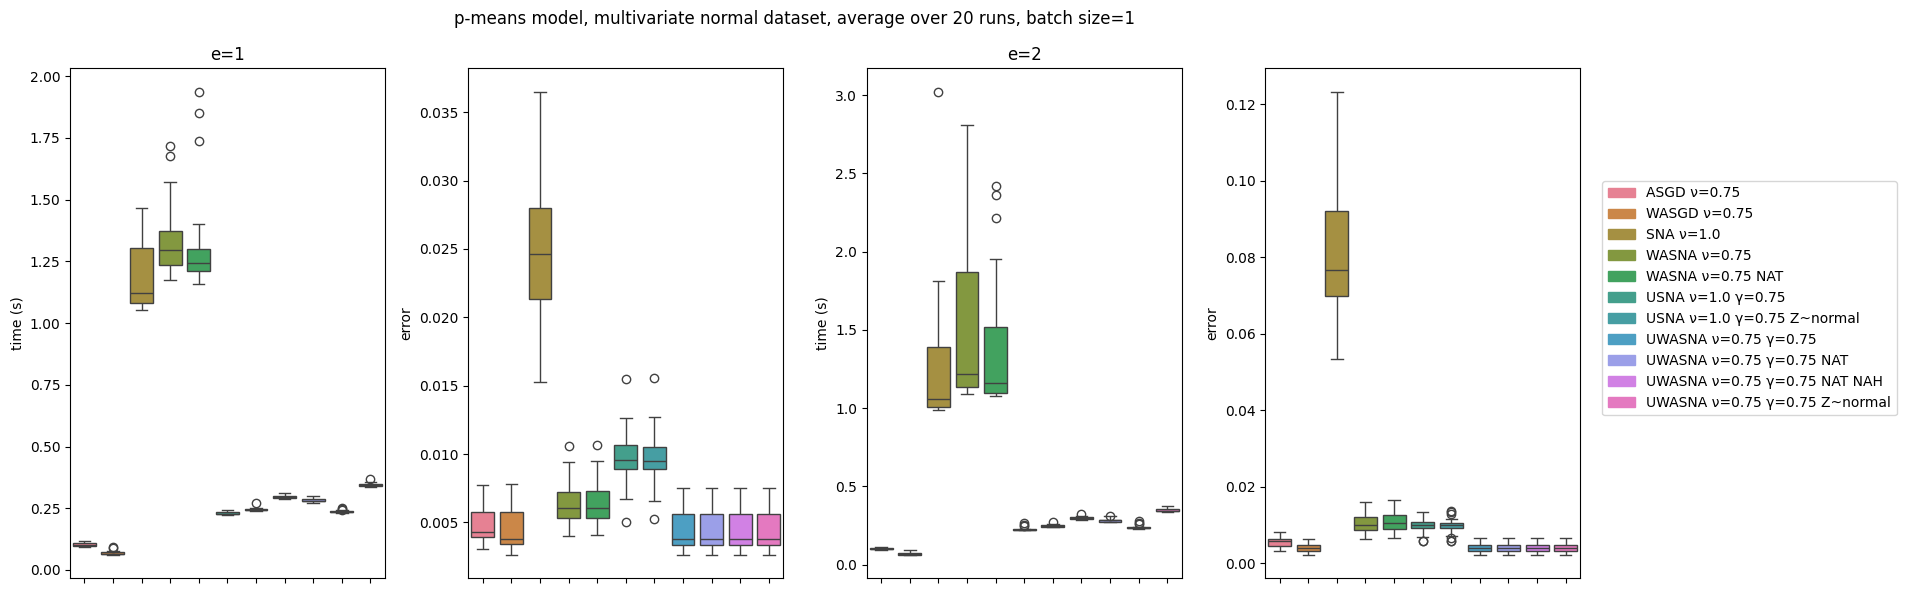

In [13]:
simulation.run_multiple_datasets(N=N, n=n, eval_time=True)

In [14]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

,ASGD ν=0.75,WASGD ν=0.75,SNARiccati ν=1.0,WASNARiccati ν=0.75,WASNARiccati ν=0.75 NAT,USNA ν=1.0 γ=0.75,USNA ν=1.0 γ=0.75 Z~normal,UWASNA ν=0.75 γ=0.75,UWASNA ν=0.75 γ=0.75 NAT,UWASNA ν=0.75 γ=0.75 NAT NAH,UWASNA ν=0.75 γ=0.75 Z~normal
Training Accuracy,72.550000,72.900000,76.520000,70.870000,70.560000,65.060000,44.460000,72.570000,72.560000,72.580000,72.600000
Test Accuracy,72.740000,73.170000,76.650000,70.660000,70.540000,65.330000,44.570000,72.720000,72.700000,72.720000,72.750000
Time,4.680000,4.710000,8.930000,12.610000,10.140000,12.940000,14.560000,22.450000,20.140000,16.850000,23.260000
